In [1]:
import cv2
print(cv2.__version__)

4.10.0


In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as mplt

In [5]:
import seaborn as sns

In [6]:
from keras.datasets import cifar10

#DATASET IMPORT

In [7]:
(input_train, output_train) , (input_test, output_test) = cifar10.load_data()

In [8]:
input_train.shape

(50000, 32, 32, 3)

In [9]:
input_test.shape

(10000, 32, 32, 3)

In [10]:
output_train.shape # 1 below is the target class

(50000, 1)

In [11]:
output_test.shape

(10000, 1)

#DATA Visualisation

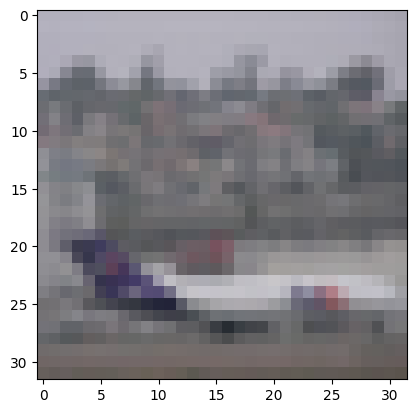

In [12]:
i = 30000
mplt.imshow(input_train[i])

In [13]:
print(output_train[i]) # corresponds to which class the image belongs to here its probably a deer

[0]


In [14]:
width=15
length=15
# creating a grid by giving its dimesions total 15 x 15=225

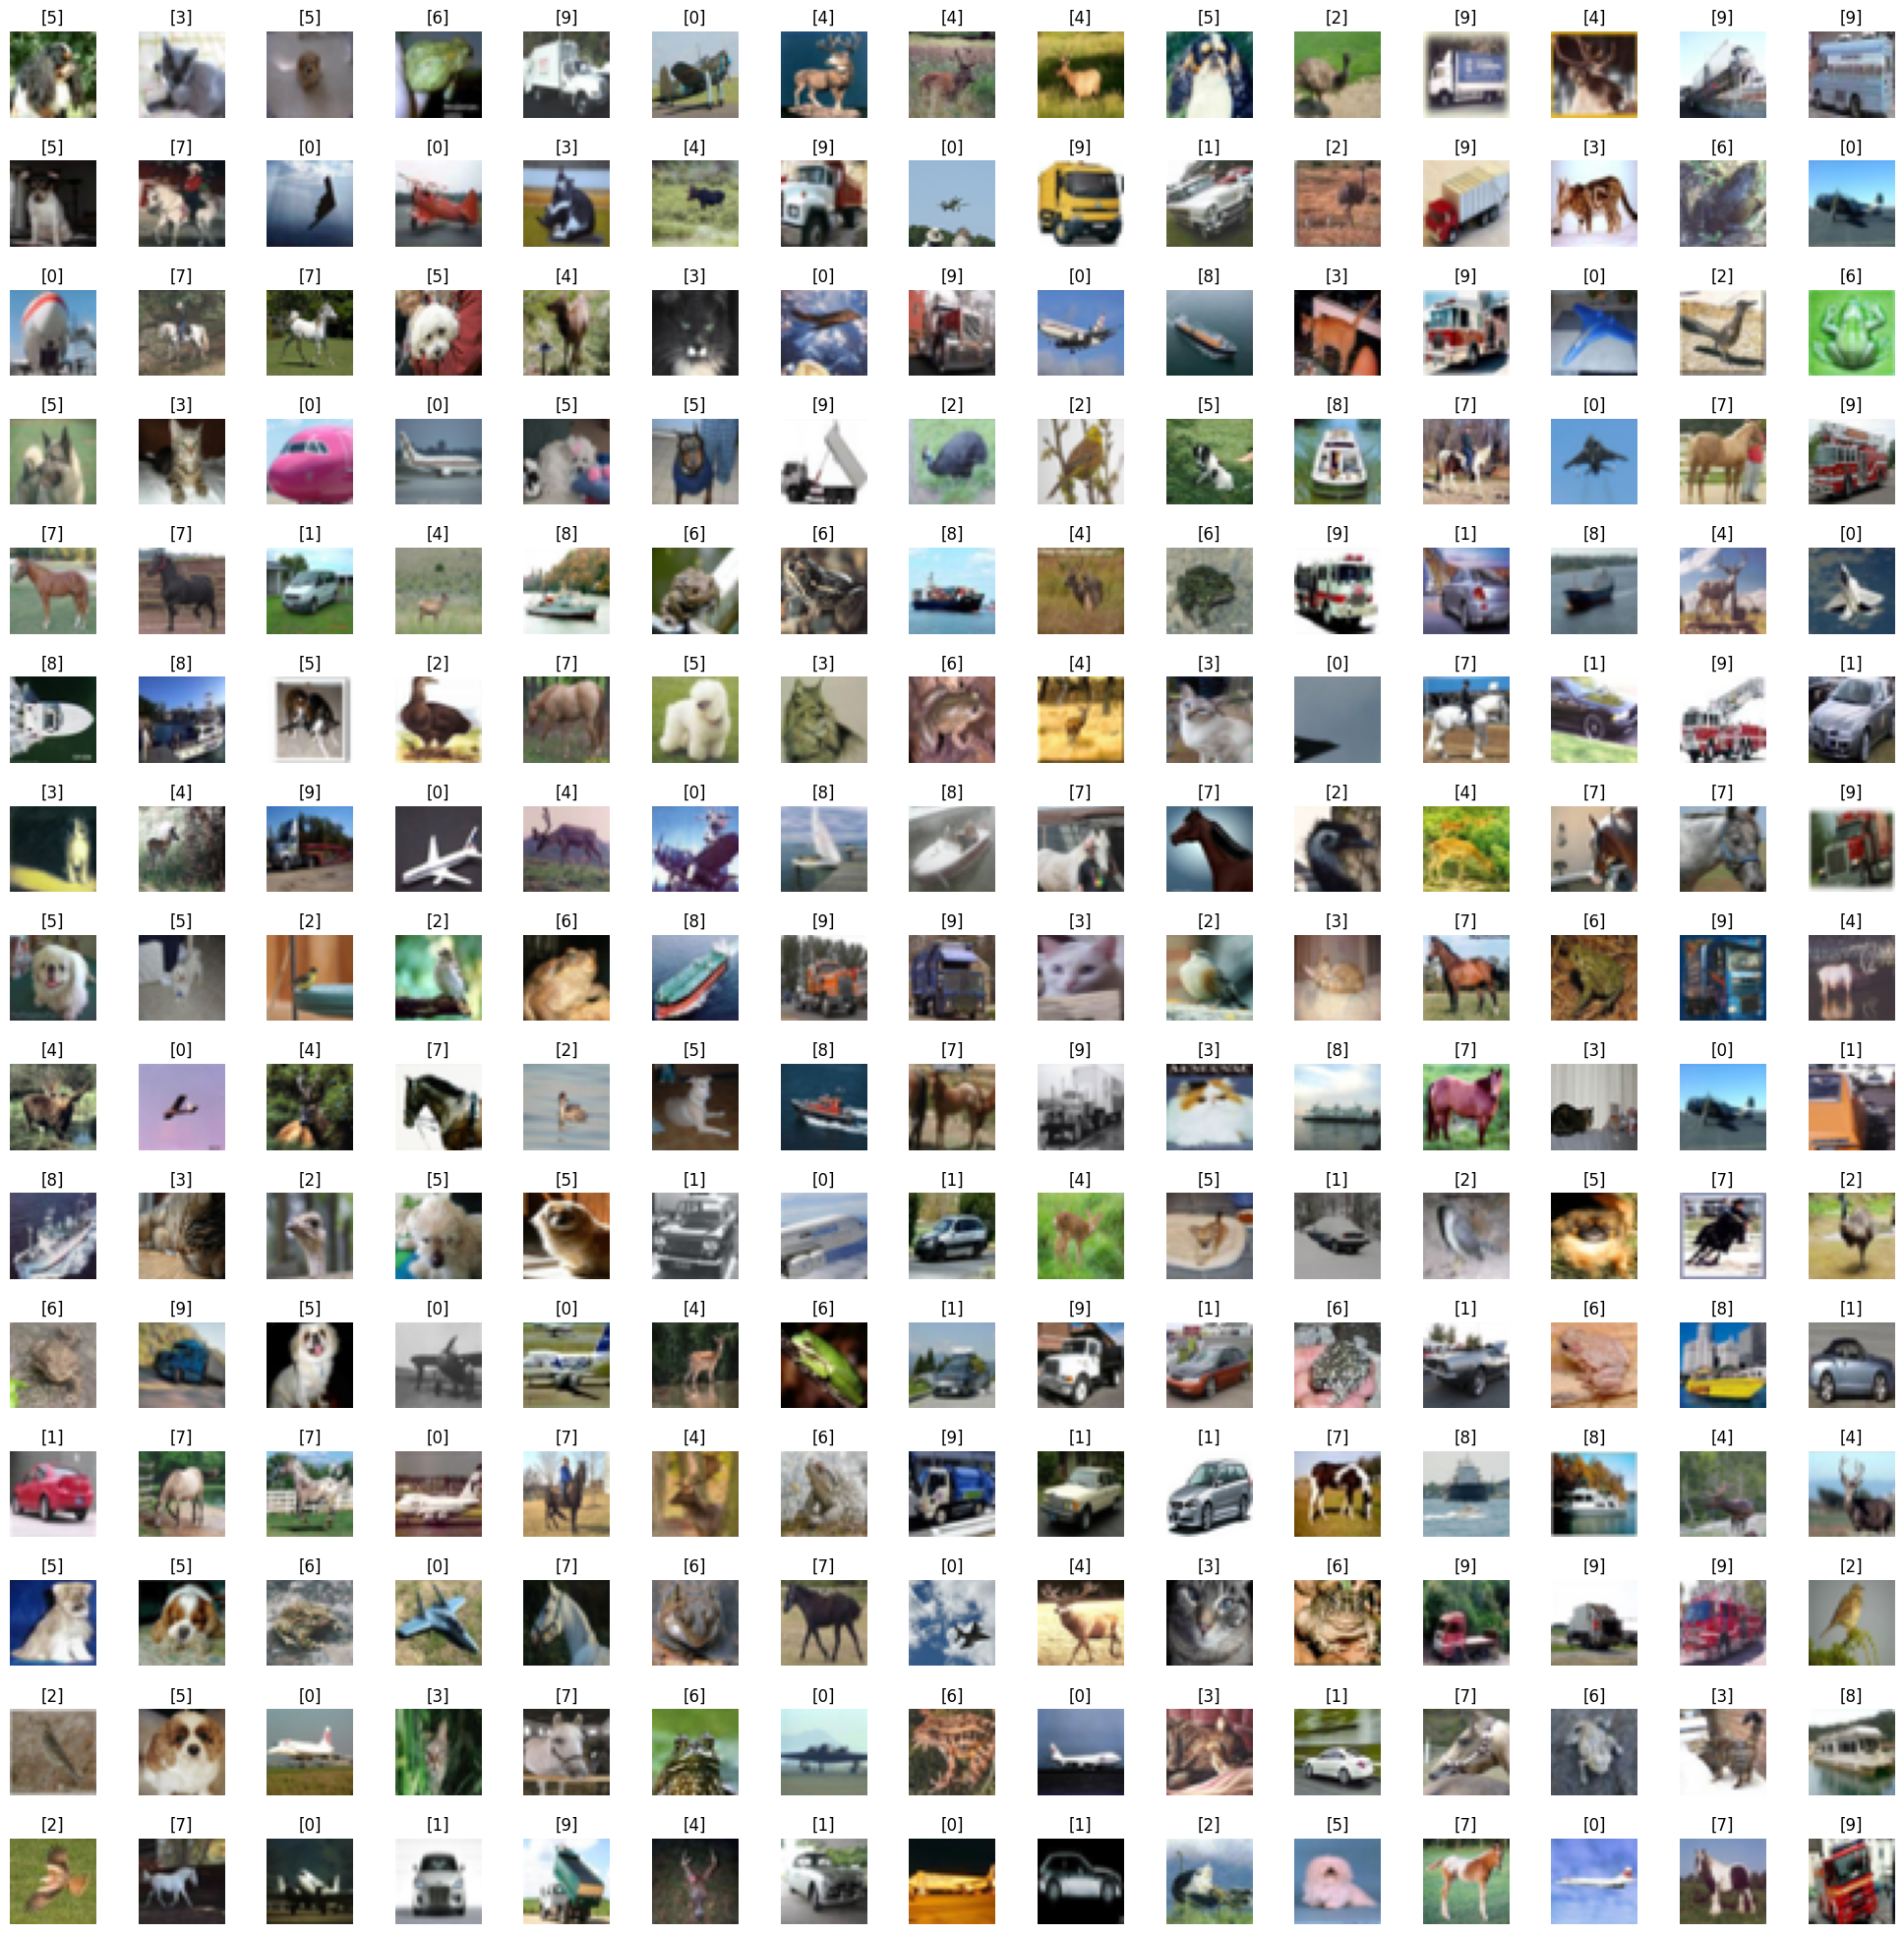

In [15]:
fig, axes = mplt.subplots(length, width, figsize = (25, 25)) # we now subplot width and length= rows and columns in the grid | 
#fig ( container of the subplots created )and axes( individual subplots within overall figure fig) are used to manioulate the image | 
#fig size is size of image
axes=axes.ravel() #flatten multidimensional into single dimensional that is 15x15(2 dimension) is into 225(1 dimension)


 #15 x 15 grid created next we will be training this

training =len(input_train)

for i in np.arange(0,length*width):
    # accesses each grid
    index=np.random.randint(0,training)
    axes[i].imshow(input_train[index])
    axes[i].set_title(output_train[index])
    axes[i].axis('off')

mplt.subplots_adjust(hspace=0.5)

In [16]:
training

50000

#Data Cleaning

In [17]:
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

In [18]:
totalno_categorical_vals=10 #number of classes in CIFAR10

In [19]:
output_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [20]:
import keras 
output_train= keras.utils.to_categorical(output_train,totalno_categorical_vals) # changes the output_train into binary values to be ready for training

In [21]:
output_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [22]:
output_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [23]:
output_test= keras.utils.to_categorical(output_test,totalno_categorical_vals)

In [24]:
output_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [25]:
input_train=input_train/255 #form of normalisation by basically understanding  the  RGB value ranges from 0 to 255
input_test=input_test/255

In [26]:
input_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [27]:
input_train.shape

(50000, 32, 32, 3)

In [28]:
Input_shape= input_train.shape[1:]

In [29]:
Input_shape # removed the no of datas value that is 50000

(32, 32, 3)

# TRAINING DATA

In [30]:
from keras.models import Sequential

In [31]:
from keras.layers import Conv2D, MaxPooling2D,AveragePooling2D, Dense, Flatten, Dropout

In [32]:
from keras.optimizers import Adam

In [33]:
from keras.optimizers import RMSprop

In [34]:
from keras.callbacks import TensorBoard

# Train with more epochs and neurons for better accuracy

In [35]:
cnn_model=Sequential()
cnn_model.add(Conv2D(filters=64,kernel_size=(3,3), activation= 'relu',input_shape= Input_shape))
cnn_model.add(Conv2D(filters=64,kernel_size=(3,3), activation= 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.3))


cnn_model=Sequential()
cnn_model.add(Conv2D(filters=128,kernel_size=(3,3), activation= 'relu'))
cnn_model.add(Conv2D(filters=128,kernel_size=(3,3), activation= 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.2))

cnn_model.add(Flatten())

cnn_model.add(Dense(units= 1024, activation ='relu'))
cnn_model.add(Dense(units= 1024, activation ='relu'))

cnn_model.add(Dense(units=10, activation='softmax'))




C:\Users\moham\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.RMSprop(learning_rate=0.001), metrics = ['accuracy'])

In [37]:
history =cnn_model.fit(input_train, output_train, batch_size= 32, epochs= 1, shuffle= True) #shuffle changes the classes from cifar10

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 597s 380ms/step - accuracy: 0.3665 - loss: 1.7865


# Evaluation of the model

In [38]:
evaluation= cnn_model.evaluate(input_test,output_test)
print('Test Accuracy: {}'.format(evaluation[1]))               # evaluation[0] gives loss value #evaluation[1] gives accuracy value

313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 73ms/step - accuracy: 0.5325 - loss: 1.3257
Test Accuracy: 0.5325000286102295


In [39]:
class_prediction= cnn_model.predict(input_test)
class_prediction

313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 77ms/step


array([[1.4281174e-02, 1.9289743e-02, 2.0061792e-01, ..., 2.2084989e-02,
        1.6876090e-02, 2.7057499e-02],
       [5.2599002e-02, 3.5889027e-01, 5.7583879e-04, ..., 1.7619332e-04,
        5.5070603e-01, 3.5134353e-02],
       [2.4968156e-01, 1.4028729e-01, 9.1696478e-02, ..., 2.6684774e-02,
        2.5734308e-01, 8.4439687e-02],
       ...,
       [2.3523897e-03, 6.5900985e-04, 3.1181538e-01, ..., 4.0747825e-02,
        1.4785387e-03, 2.3555954e-03],
       [4.7175068e-02, 2.2055624e-01, 1.8375729e-01, ..., 2.4888029e-02,
        9.0913428e-03, 1.6939828e-02],
       [1.6647087e-04, 8.0115278e-05, 3.3983332e-03, ..., 9.4387531e-01,
        3.8038679e-06, 1.6867269e-04]], dtype=float32)

In [40]:
class_prediction= class_prediction.argmax(1) #axis=1 tells argmax to look for the maximum value across columns in each row

In [41]:
class_prediction

array([6, 8, 8, ..., 5, 4, 7], dtype=int64)

In [42]:
output_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [43]:
output_test=output_test.argmax(1)

In [44]:
output_test

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

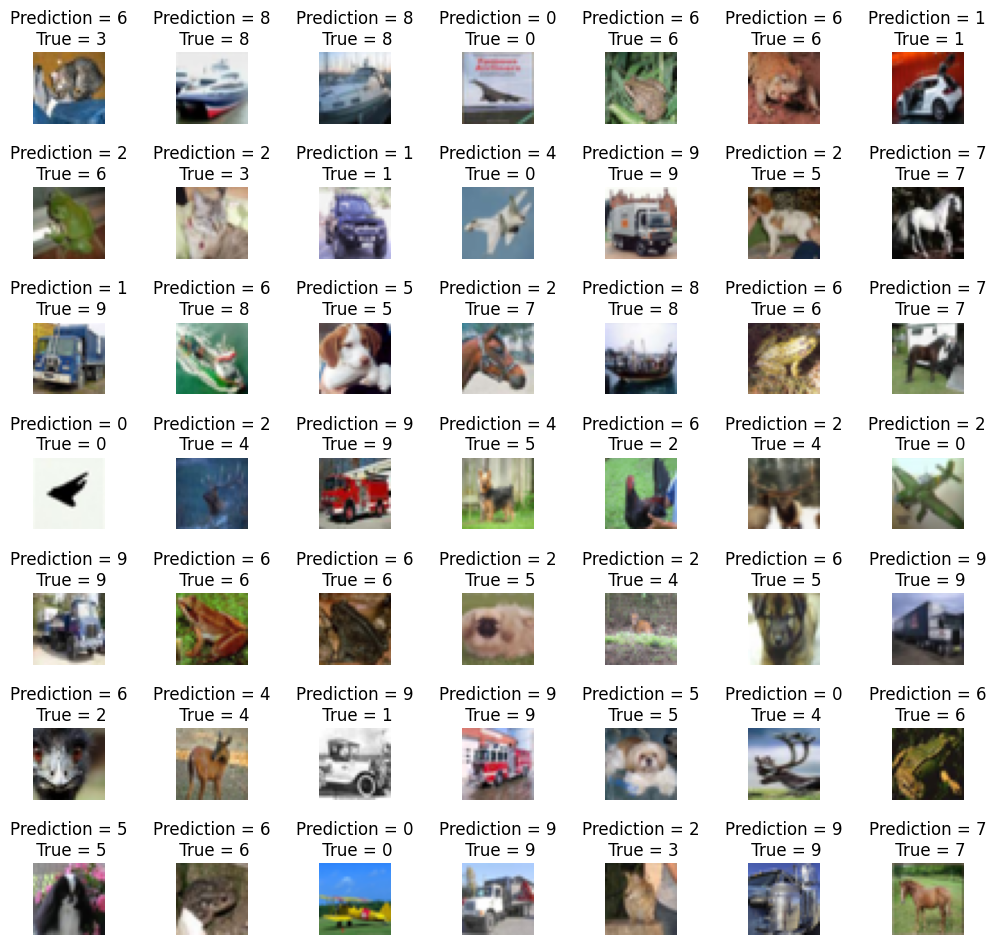

In [45]:
l_evaluate= 7
w_evaluate= 7
fig, axes = mplt.subplots(l_evaluate, w_evaluate, figsize = (12, 12))
axes=axes.ravel()


for i in np.arange(0,l_evaluate*w_evaluate):
    axes[i].imshow(input_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(class_prediction[i], output_test[i]))
    axes[i].axis('off')

mplt.subplots_adjust(wspace = 1)    

In [46]:
from sklearn.metrics import confusion_matrix

In [47]:
cm= confusion_matrix(output_test,class_prediction)

In [48]:
cm

array([[582,  15, 238,   6,   9,   4,  42,  15,  61,  28],
       [ 37, 687,  57,   4,   3,   4,  93,   4,  39,  72],
       [ 33,   2, 800,  12,  24,  18,  78,  25,   7,   1],
       [ 11,   7, 387, 138,  27, 110, 293,  18,   5,   4],
       [ 17,   1, 519,  11, 203,   8, 141,  92,   8,   0],
       [  3,   1, 451,  45,  20, 289, 145,  41,   3,   2],
       [  3,   1, 220,   2,   8,   2, 758,   5,   0,   1],
       [  6,   2, 217,  12,  33,  38,  43, 645,   1,   3],
       [112,  57,  97,   9,   2,   4,  40,   5, 648,  26],
       [ 44, 111,  61,  12,   3,   6, 102,  45,  41, 575]], dtype=int64)

<Axes: >

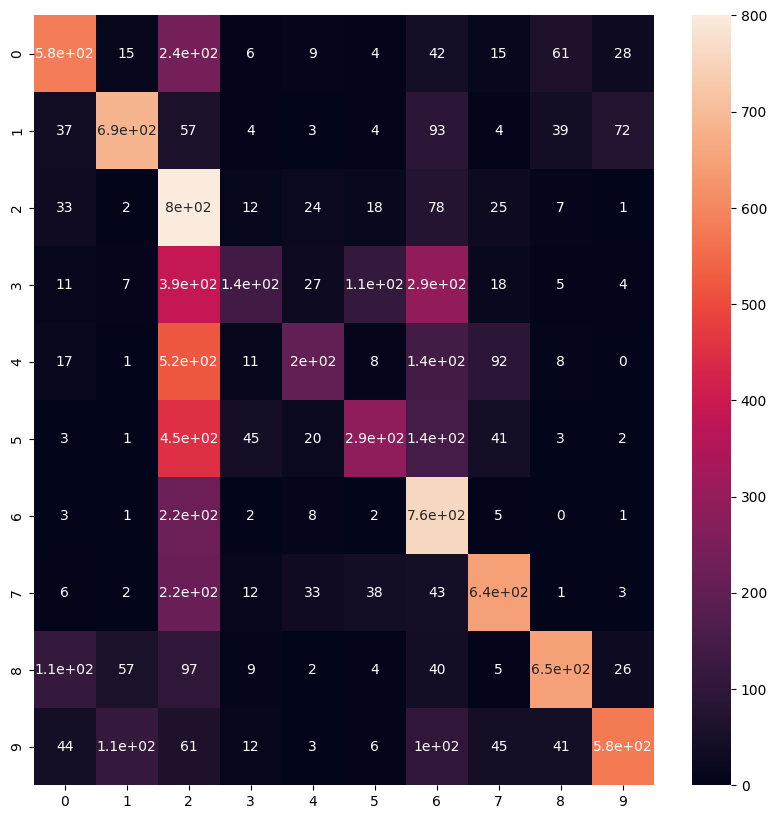

In [49]:
mplt.figure(figsize= (10,10))
sns.heatmap(cm, annot= True)

# SAVING THE MODEL

In [50]:
import os 
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model.h5')
cnn_model.save(model_path)

# DataAugumentation-Image Augumentation
Image Augmentation is the process of artificially increasing the variations of the images in the datasets by flipping, enlarging, rotating the original images.
Augmentations also include shifting and changing the brightness of the images.

In [ ]:
import keras
from keras.datasets import cifar10
(input_train, output_train), (input_test, output_test) = cifar10.load_data()

In [ ]:
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

In [ ]:
input_train.shape

In [ ]:
n = 8 
input_train_sample = input_train[:n]
input_train_sample.shape

 various fields example for reference of ImageDataGenerator(

    rotation_range=0,          # Degree range for random rotations
    width_shift_range=0.0,     # Fraction of total width for horizontal shifts
    height_shift_range=0.0,    # Fraction of total height for vertical shifts
    shear_range=0.0,           # Shear intensity (shear angle in counter-clockwise direction in degrees)
    zoom_range=0.0,            # Range for random zoom
    horizontal_flip=False,     # Randomly flip inputs horizontally
    vertical_flip=False,       # Randomly flip inputs vertically
    rescale=None,              # Rescaling factor (e.g., 1./255 for normalizing pixel values)
    fill_mode='nearest',       # Points outside the boundaries are filled according to this mode ('constant', 'nearest', 'reflect', or 'wrap')
    data_format=None,          # Image data format, either "channels_first" or "channels_last"
    validation_split=0.0       # Fraction of images reserved for validation
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# dataget_train = ImageDataGenerator(vertical_flip=True) you can use shift + tab to find other arguments
dataget_train = ImageDataGenerator(brightness_range=(1,3)) #within () we can use rotation_range,vertical_flip, height_shift_range
dataget_train.fit(input_train_sample)


In [ ]:
#from scipy.misc import toimage
from PIL import Image

fig = mplt.figure(figsize = (20,2))
for input_batch in dataget_train.flow(input_train_sample, batch_size = n):
     for i in range(0,n):
            ax = fig.add_subplot(1, n, i+1)
            ax.imshow(Image.fromarray(np.uint8(input_batch[i])))
     fig.suptitle('Augmented images (brightness range from min 1 to max 3)')
     mplt.show()
     break;


# MODEL TRAINING WITH AUGUMENTED SET  Skip the previous step to run the following step

In [51]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
                            rotation_range = 90,
                            width_shift_range = 0.1,
                            horizontal_flip = True,
                            vertical_flip = True
                             )

datagen.fit(input_train)

In [52]:
cnn_model.fit(datagen.flow(input_train, output_train, batch_size=32), epochs=2)

Epoch 1/2


C:\Users\moham\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 616s 393ms/step - accuracy: 0.3863 - loss: 1.7190
Epoch 2/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1400s 896ms/step - accuracy: 0.4574 - loss: 1.5287


In [55]:
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
score = cnn_model.evaluate(input_test, output_test)
print('Test accuracy', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 68s 214ms/step - accuracy: 0.5059 - loss: 1.4037
Test accuracy 0.5051000118255615


In [56]:
# save the model
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model_Augmentation.h5')
cnn_model.save(model_path)